# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [3]:
# filename = "../data/user/data_04052022_143527.csv"
# filename = "../data/user/data_04052022_170752.csv"
filename = "../data/user/data_05052022_182742.csv"

## all strokes

In [4]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [5]:
data.iloc[3282:3285]

,source,data
3282,/data,"{""sample_key"":""9406493_320"",""timestamp0"":94064..."
3283,/data,"{""xyp_sg"":[0.024899333715439,0.005689381621778..."
3284,/data,"{""sample_key"":""9412870_40"",""timestamp0"":941287..."


In [6]:
data_df = utils.format_from_df(data)

KeyError 3283 {'xyp_sg': [0.024899333715439, 0.005689381621778, 0.00081603921717], 's': 2.5541062677794413, 'angle': 0.2246388526469221, 'da': 0, 'segment_id': 146}


In [7]:
data_df.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,9358917_50,9358917,0.000000,50,183,0,0.410004,0.491490,0.018330,-0.000392,...,0.000659,-0.000002,0.000031,0.000236,-0.000001,0.000013,0.000074,0.001306,1.651232,0.0
1,9358932_60,9358932,0.000172,60,183,0,0.409656,0.493311,0.016545,-0.000740,...,-0.001125,-0.000008,0.000099,0.000504,-0.000003,0.000036,0.000138,0.003611,1.658115,0.0
2,9358932_70,9358932,0.000172,70,183,0,0.409188,0.494918,0.015636,-0.001208,...,-0.002034,-0.000023,0.000260,0.000881,-0.000008,0.000084,0.000213,0.008482,1.667421,0.0
3,9358949_80,9358949,0.000367,80,183,0,0.408594,0.496733,0.015348,-0.001802,...,-0.002323,-0.000058,0.000585,0.001279,-0.000019,0.000173,0.000271,0.017383,1.679118,0.0
4,9358962_90,9358962,0.000517,90,183,0,0.407958,0.498688,0.015245,-0.002438,...,-0.002426,-0.000130,0.001152,0.001546,-0.000039,0.000314,0.000275,0.031655,1.693168,0.0


<AxesSubplot:>

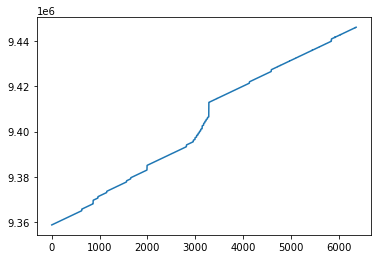

In [13]:
# data['timestamp'].plot()
data_df['t0'].plot()

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

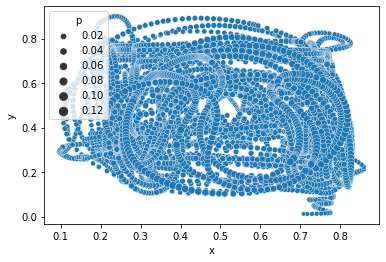

In [10]:
sns.scatterplot(data=data_df, x='x', y='y', size='p')

In [11]:
stroke_id_list = list(set(data_df['stroke_id']))
min(stroke_id_list), max(stroke_id_list)

(183, 206)

<AxesSubplot:xlabel='x', ylabel='y'>

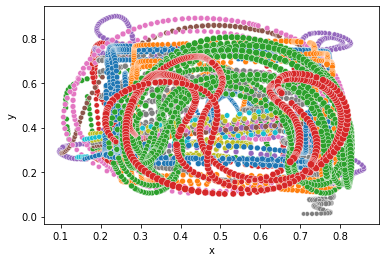

In [12]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [12]:
data.shape

(4652, 2)

<AxesSubplot:>

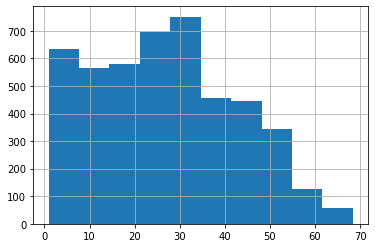

In [13]:
(data_df['p']*100).hist()

In [23]:
tmp = data_df.groupby('stroke_id').apply(lambda x: list(set(x['segment_id'])))

In [24]:
tmp

stroke_id
33           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
34                                         [13, 14, 15]
35                                         [16, 17, 18]
36                                     [19, 20, 21, 22]
37    [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...
38                 [43, 44, 45, 46, 47, 48, 49, 50, 51]
39             [52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
40             [64, 65, 66, 67, 68, 69, 70, 71, 62, 63]
41                     [72, 73, 74, 75, 76, 77, 78, 79]
42                                     [80, 81, 82, 83]
43                                                 [84]
44                                                 [85]
45                                                 [86]
46                                                 [87]
47                                                 [88]
48                                                 [89]
49                                                 [90]
50                                    

In [29]:
stroke_segment_map = {}
segment_stroke_map = {}
for i, row in tmp.iteritems():
    stroke_segment_map[i] = row
    for segment in row:
        segment_stroke_map[segment] = i

In [32]:
row

[192, 193, 194, 190, 191]

In [31]:
segment_stroke_map[89]

48

In [16]:
# set(data_df['segment_id'])

## features

<AxesSubplot:>

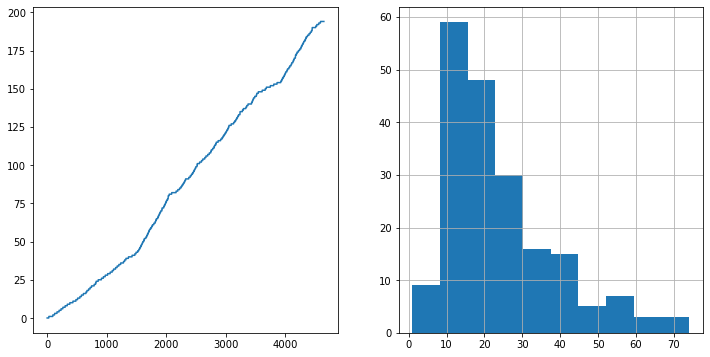

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['segment_id'].plot(ax=ax[0])
data_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

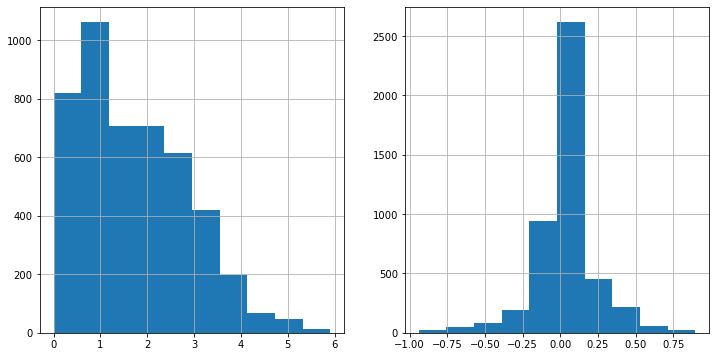

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['s'].hist(ax=ax[0])
data_df['da'].hist(ax=ax[1])

## one stroke

In [78]:
stroke_i = select(data_df, stroke_id=33)

In [79]:
stroke_i.head()

,key,t0,ts,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,413029_50,413029,50,33,0,0.223129,0.892393,0.027828,-0.008367,0.009580,0.026180,-0.000062,0.000080,0.001497,-0.000027,0.000035,0.000484,0.004416,2.235980,0.0
1,413042_60,413042,60,33,0,0.219116,0.895468,0.029969,-0.012380,0.012655,0.028322,-0.000208,0.000265,0.003351,-0.000078,0.000098,0.000962,0.012584,2.243951,0.0
2,413063_70,413063,70,33,0,0.215337,0.897837,0.030219,-0.016160,0.015025,0.028571,-0.000574,0.000717,0.006316,-0.000191,0.000233,0.001650,0.030109,2.257383,0.0
3,413063_80,413063,80,33,0,0.212147,0.899261,0.029894,-0.019350,0.016449,0.028247,-0.001337,0.001617,0.010371,-0.000400,0.000471,0.002486,0.061832,2.275308,0.0
4,413076_90,413076,90,33,0,0.208289,0.900919,0.029537,-0.023208,0.018106,0.027889,-0.002689,0.003123,0.015187,-0.000738,0.000831,0.003334,0.111127,2.297329,0.0


<AxesSubplot:xlabel='ts', ylabel='s'>

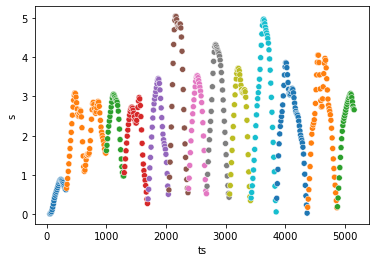

In [80]:
sns.scatterplot(data=stroke_i, x='ts', y='s', hue='segment_id', palette='tab10', legend=False)

## check closest neighbours

This has been removed temporarily.

In [81]:
# min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
# min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

# plt.plot(min_dtw_id)

# plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [82]:
# filename = "../data/user/data_25042022_170416.csv"

In [83]:
gi = data_df.groupby('segment_id').get_group(33)

<AxesSubplot:>

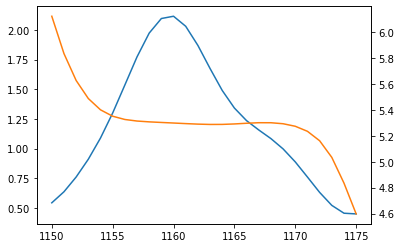

In [84]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['angle'].plot(ax=axt, c=tab10[1])

In [55]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [56]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

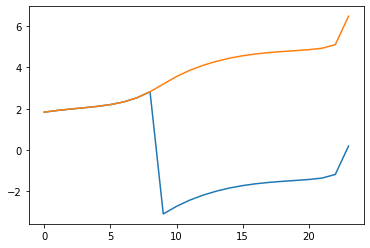

In [57]:
plt.plot(alpha.values)
plt.plot(np.unwrap(alpha))

In [58]:
alpha = alpha.values

The angle computed from atan2 is prone to phase wrapping. The function below is meant to emulate the behaviour of np.unwrap in a stream manner.
This is implemented in the MAX/MSP app in javascript.

In [59]:
def unwrap(x_arr):
    global last, acc
    last = 0
    acc = 0
    def unwrap_(x, period=np.pi):
        global last, acc
        # print(x, last, acc)
        diff = x+acc - last
        if np.abs(diff) > period:
            if diff < 0:
                acc += 2*period
            if diff > 0:
                acc -= 2*period
        x += acc
        last = x

        return x
    res = []
    for x in x_arr:
        res.append(unwrap_(x))
    
    return np.array(res)

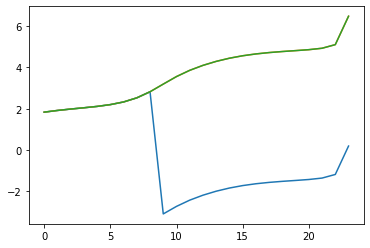

In [60]:
plt.plot(alpha)
plt.plot(np.unwrap(alpha))
plt.plot(unwrap(alpha))